<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Hypothesis Testing**


Estimated time needed: **30** minutes


The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.


## Objectives


* Import Libraries
* Lab exercises
    * Stating the hypothesis
    * Levene's Test for equality
    * Preparing your data for hypothesis testing
* Quiz


----


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


Import the libraries we need for the lab


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

Read in the csv file from the URL using the request library


In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [4]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Lab Exercises


### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?


We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.
* One independent, categorical variable with two levels or group
* One dependent continuous variable
* Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
* The dependent variable must follow a normal distribution
* Assumption of homogeneity of variance


State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in evaluation scores between male and females")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in evaluation scores between male and females")


We can plot the dependent variable with a historgram


<ipython-input-5-15132377d28d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratings_df['eval'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

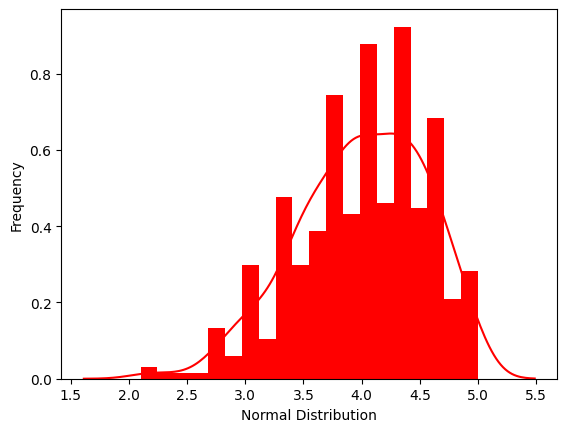

In [5]:
ax = sns.distplot(ratings_df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance


In [6]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [7]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender


### ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:
* 40 years and younger
* between 40 and 57 years
* 57 years and older


In [8]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ


Test for equality of variance


In [9]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'],
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'],
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

First, separate the three samples (one for each job category) into a variable each.


In [10]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.


In [11]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### ANOVA: Using the teachers' rating data set, does teaching  evaluation  score for instructors  differ  by age?


Test for equality of variance


In [12]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'],
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'],
                   center='mean')


LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [13]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536


**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:
* $H_0:$ The proportion of teachers who are tenured is independent of gender
* $H_1:$ The proportion of teachers who are tenured is associated with gender


Create a Cross-tab table


In [15]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


Use the <code>scipy.stats</code> library and set correction equals False as that will be the same answer when done by hand, it returns: 𝜒2 value, p-value, degree of freedom, and expected values.


In [16]:
scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.


### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?


State the hypothesis:
* $H_0:$ Teaching evaluation score is not correlated with beauty score
* $H_1:$ Teaching evaluation score is correlated with beauty score


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


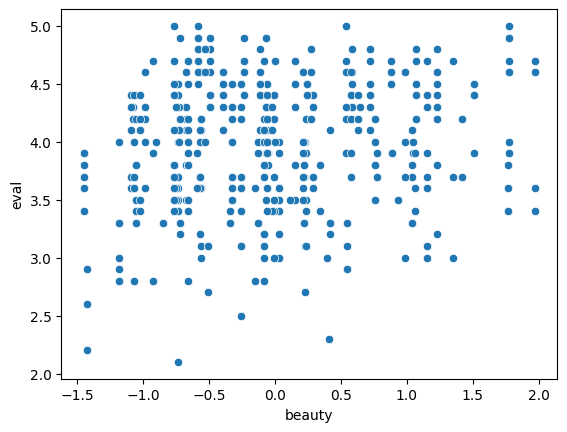

In [17]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [18]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

PearsonRResult(statistic=0.18903909084045206, pvalue=4.247115419813754e-05)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.


## Practice Questions


### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?
* Use α = 0.05


In [20]:
# prompt: À l’aide de l’ensemble de données d’évaluation des enseignants, la titularisation affecte-t-elle les notes d’évaluation de l’enseignement ?
# Utilisation α = 0,05

import scipy.stats

# State the hypothesis:
# H0: There is no difference in evaluation scores between tenured and non-tenured teachers.
# H1: There is a difference in evaluation scores between tenured and non-tenured teachers.

# Perform an independent samples t-test
tenured_scores = ratings_df[ratings_df['tenure'] == 1]['eval']
non_tenured_scores = ratings_df[ratings_df['tenure'] == 0]['eval']
t_statistic, p_value = scipy.stats.ttest_ind(tenured_scores, non_tenured_scores)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis. There is a statistically significant difference in evaluation scores between tenured and non-tenured teachers.")
else:
  print("Fail to reject the null hypothesis. There is no statistically significant difference in evaluation scores between tenured and non-tenured teachers.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no statistically significant difference in evaluation scores between tenured and non-tenured teachers.


Double-click **here** for the solution.

<!-- The answer is below:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)
The p-value is less than 0.05 that means that - we will reject the null hypothesis as there evidence that being tenured affects teaching evaluation scores
-->


### Question 2: Using the teachers rating data set, is there an association between age and tenure?
* Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
* What is your conclusion at α = 0.01 and α = 0.05?


In [21]:
# prompt: Using the teachers rating data set, is there an association between age and tenure?
# Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
# What is your conclusion at α = 0.01 and α = 0.05?

# Create the contingency table
cont_table = pd.crosstab(ratings_df['age_group'], ratings_df['tenure'])
print(cont_table)

# Perform the Chi-square test
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(cont_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

alpha_01 = 0.01
alpha_05 = 0.05

print(f"\nConclusion at α = {alpha_01}:")
if p_value < alpha_01:
    print("Reject the null hypothesis. There is a statistically significant association between age group and tenure.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between age group and tenure.")

print(f"\nConclusion at α = {alpha_05}:")
if p_value < alpha_05:
    print("Reject the null hypothesis. There is a statistically significant association between age group and tenure.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between age group and tenure.")

tenure                   no  yes
age_group                       
40 years and younger     15   98
57 years and older       25   97
between 40 and 57 years  62  166
Chi-square statistic: 8.749576239010711
P-value: 0.012590809706820843
Degrees of freedom: 2

Conclusion at α = 0.01:
Fail to reject the null hypothesis. There is no statistically significant association between age group and tenure.

Conclusion at α = 0.05:
Reject the null hypothesis. There is a statistically significant association between age group and tenure.


Double-click **here** for a hint.

<!-- The hint is below:
## state your hypothesis
Null Hypothesis: There is no association between age and tenure
Alternative Hypothesis: There is an association between age and tenure

## don't forget to create a cross tab of the data
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['age_group'])
-->


Double-click **here** for the solution.

<!-- The answer is below:
## use the chi-square function
scipy.stats.chi2_contingency(cont_table, correction = True)
At the α = 0.01, p-value is greater, we fail to reject null hypothesis as there is no evidence of an association between age and tenure
At the α = 0.05, p-value is less, we reject null hypoothesis as there is evidence of an association between age and tenure
-->


### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors
* Use α = 0.05


In [22]:
# prompt: Test for equality of variance for beauty scores between tenured and non-tenured instructors
# Use α = 0.05

import scipy.stats
# Assuming ratings_df is already loaded as in the provided code

# State the hypothesis:
# H0: The variances of beauty scores are equal for tenured and non-tenured instructors.
# H1: The variances of beauty scores are not equal for tenured and non-tenured instructors.

# Perform Levene's test for equality of variance
tenured_beauty = ratings_df[ratings_df['tenure'] == 1]['beauty']
non_tenured_beauty = ratings_df[ratings_df['tenure'] == 0]['beauty']

statistic, p_value = scipy.stats.levene(tenured_beauty, non_tenured_beauty)

print(f"Levene's test statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of unequal variances in beauty scores between tenured and non-tenured instructors.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of unequal variances in beauty scores between tenured and non-tenured instructors.")

Levene's test statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no evidence of unequal variances in beauty scores between tenured and non-tenured instructors.


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Double-click **here** for the solution.

<!-- The answer is below:
### use the levene function to find the p-value and conclusion
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                   ratings_df[ratings_df['tenure'] == 'no']['beauty'],
                   center='mean')
Since the p-value is greater than 0.05, we will assume equality of variance of both groups
-->


### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?
* Use α = 0.05


In [24]:
# prompt: Using the teachers rating data set, is there an association between visible minorities and tenure?
# Use α = 0.05

# Create the contingency table
cont_table = pd.crosstab(ratings_df['minority'], ratings_df['tenure'])
print(cont_table)

# Perform the Chi-square test
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(cont_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05

print(f"\nConclusion at α = {alpha}:")
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant association between visible minority status and tenure.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between visible minority status and tenure.")

tenure    no  yes
minority         
no        92  307
yes       10   54
Chi-square statistic: 1.3675127484429763
P-value: 0.24223968800237178
Degrees of freedom: 1

Conclusion at α = 0.05:
Fail to reject the null hypothesis. There is no statistically significant association between visible minority status and tenure.


Double-click **here** for a hint.

<!-- The hint is below:
##State you hypothesis and Create a cross-tab:
Null Hypothesis: There is no association between visible minorities and tenure
Alternative Hypothesis: There is an association between visible minorities and tenure

cont_table  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
-->


Double-click **here** for the solution.

<!-- The answer is below:
## run the chi2_contingency() on the contigency table
scipy.stats.chi2_contingency(cont_table, correction = True)
Since the p-value is greater than 0.05, we fail to reject null hypothesis as there is no evidence of an association between visible minorities and tenure
-->


## Authors


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is a current employee of IBM where she started as a Junior Data Scientist at the Global Business Services (GBS) in 2018. Her main role was making meaning out of data for their Oil and Gas clients through basic statistics and advanced Machine Learning algorithms. The highlight of her time in GBS was creating a customized end-to-end Machine learning and Statistics solution on optimizing operations in the Oil and Gas wells. She moved to the Cognitive Systems Group as a Senior Data Scientist where she will be providing the team with actionable insights using Data Science techniques and further improve processes through building machine learning solutions. She recently joined the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-08-14  | 0.1  | Aije Egwaikhide  |  Created the initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
